<a href="https://colab.research.google.com/github/zorrento/open-ML-course-sandbox/blob/main/Sandbox_for_ODS_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Тема №1: первичный анализ данных с Python

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ODS Course/BigML_Dataset_633b2abaaba2df313d0016ae.csv')

In [ ]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [ ]:
cols = ['total day minutes', 'total eve minutes', 'total night minutes']

In [ ]:
df.groupby(by=['churn'])[cols].agg([np.mean, np.std, np.max])

total day minutes                   total eve minutes                    \
                   mean        std   amax              mean        std   amax   
churn                                                                           
False        175.175754  50.181655  315.6        199.043298  50.292175  361.8   
True         206.914079  68.997792  350.8        212.410145  51.728910  363.7   

      total night minutes                    
                     mean        std   amax  
churn                                        
False          200.133193  51.105032  395.0  
True           205.231677  47.132825  354.9

In [ ]:
pd.crosstab(df['churn'], df['international plan'])

international plan    no  yes
churn                        
False               2664  186
True                 346  137

In [ ]:
pd.crosstab(df['churn'], df['voice mail plan'], normalize=True)

voice mail plan        no       yes
churn                              
False            0.602460  0.252625
True             0.120912  0.024002

In [ ]:
df.pivot_table(['total day calls', 'total eve calls' ,'total night calls'], ['area code'], aggfunc = 'mean')

total day calls  total eve calls  total night calls
area code                                                     
408             100.496420        99.788783          99.039379
415             100.576435       100.503927         100.398187
510             100.097619        99.671429         100.601190

In [ ]:
df['churn'] = df['churn'].astype('int')

Посмотрим, как отток связан с признаком подключения международн. роуминга "International plan"

In [ ]:
d = {'no': False, 'yes': True}
df['international plan'] = df['international plan'].map(d)

In [ ]:
pd.crosstab(df['churn'], df['international plan'], margins=True)

international plan  False  True   All
churn                                
0                    2664   186  2850
1                     346   137   483
All                  3010   323  3333

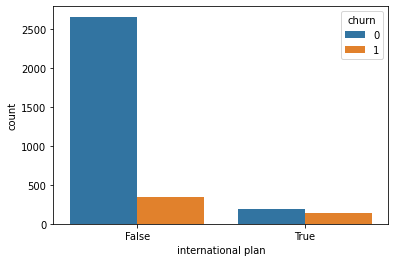

In [ ]:
sns.countplot(x='international plan', hue='churn', data=df)

In [ ]:
pd.crosstab(df['churn'], df['customer service calls'], margins=True)

customer service calls    0     1    2    3    4   5   6  7  8  9   All
churn                                                                  
0                       605  1059  672  385   90  26   8  4  1  0  2850
1                        92   122   87   44   76  40  14  5  1  2   483
All                     697  1181  759  429  166  66  22  9  2  2  3333

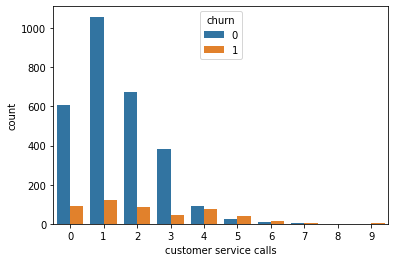

In [ ]:
from matplotlib.pyplot import annotate
sns.countplot(x='customer service calls', hue='churn', data=df)

In [ ]:
df['many service calls'] = (df['customer service calls'] > 3).astype('int')

In [ ]:
pd.crosstab(df['churn'], df['many service calls'], margins=True)

many service calls     0    1   All
churn                              
0                   2721  129  2850
1                    345  138   483
All                 3066  267  3333

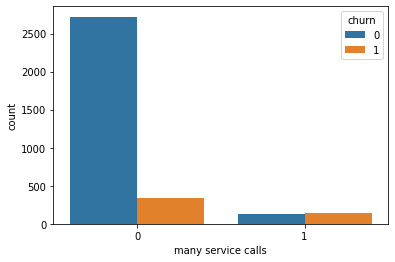

In [ ]:
sns.countplot(x='many service calls', hue='churn', data=df)

In [ ]:
pd.crosstab(df['many service calls'] & df['international plan'], df['churn'], normalize=True)

churn         0         1
row_0                    
False  0.852385  0.139214
True   0.002700  0.005701

In [ ]:
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

##Тема №2: Визуализация данных с Python

In [ ]:
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'jpg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ODS Course/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['User_Score'].replace('tbd', 4.9, inplace=True)

In [ ]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [ ]:
df.shape

(6825, 16)

In [ ]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

Name Platform  Year_of_Release         Genre  \
0                Wii Sports      Wii           2006.0        Sports   
1         Super Mario Bros.      NES           1985.0      Platform   
2            Mario Kart Wii      Wii           2008.0        Racing   
3         Wii Sports Resort      Wii           2009.0        Sports   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   

   Global_Sales  Critic_Score  Critic_Count User_Score  User_Count Rating  
0         82.53          76.0          51.0          8       322.0      E  
1         40.24           NaN           NaN        NaN         NaN    NaN  
2         35.52          82.0          73.0        8.3       709.0      E  
3         32.77          80.0          73.0          8       192.0      E  
4         31.37           NaN           NaN        NaN         NaN    NaN

In [ ]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]

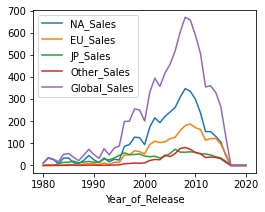

In [ ]:
sales_df.groupby(by='Year_of_Release').sum().plot()

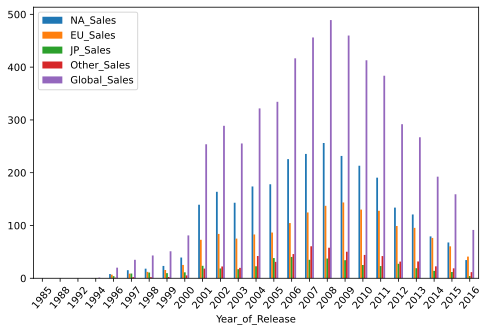

In [ ]:
sales_df.groupby(by='Year_of_Release').sum().plot(kind='bar', rot=50)

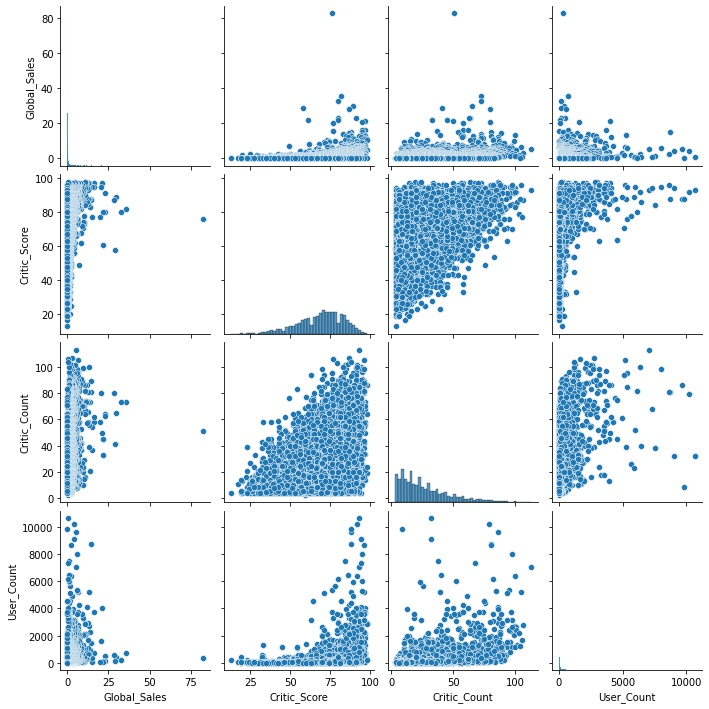

In [ ]:
#seaborn
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])

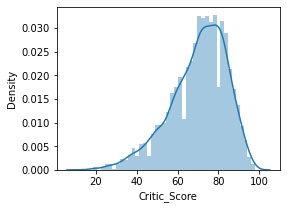

In [ ]:
sns.distplot(df['Critic_Score'])

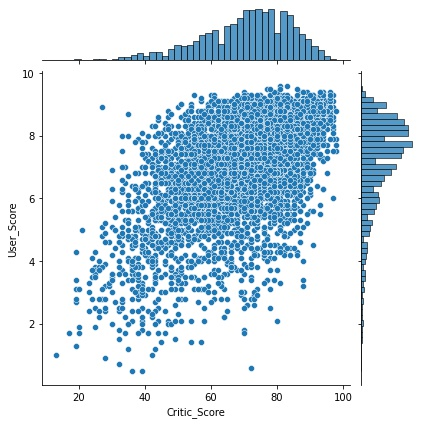

In [ ]:
sns.jointplot(df['Critic_Score'], df['User_Score'])

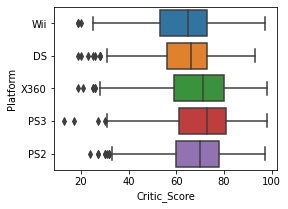

In [ ]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(x = 'Critic_Score', y = 'Platform', data = df[df['Platform'].isin(top_platforms)], orient='h')

Пример визуального анализа данных

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ODS Course/BigML_Dataset_633b2abaaba2df313d0016ae.csv')

In [ ]:
df.head(5)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [ ]:
df.shape

(3333, 21)

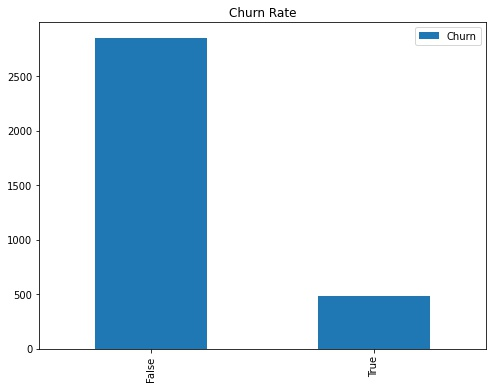

In [ ]:
df['churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Churn Rate');

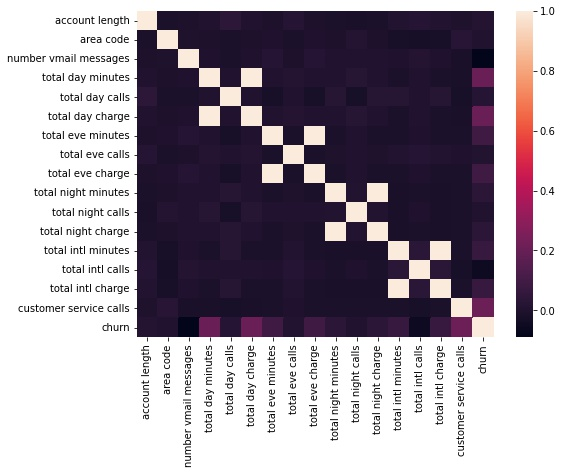

In [ ]:
sns.heatmap(df.corr())

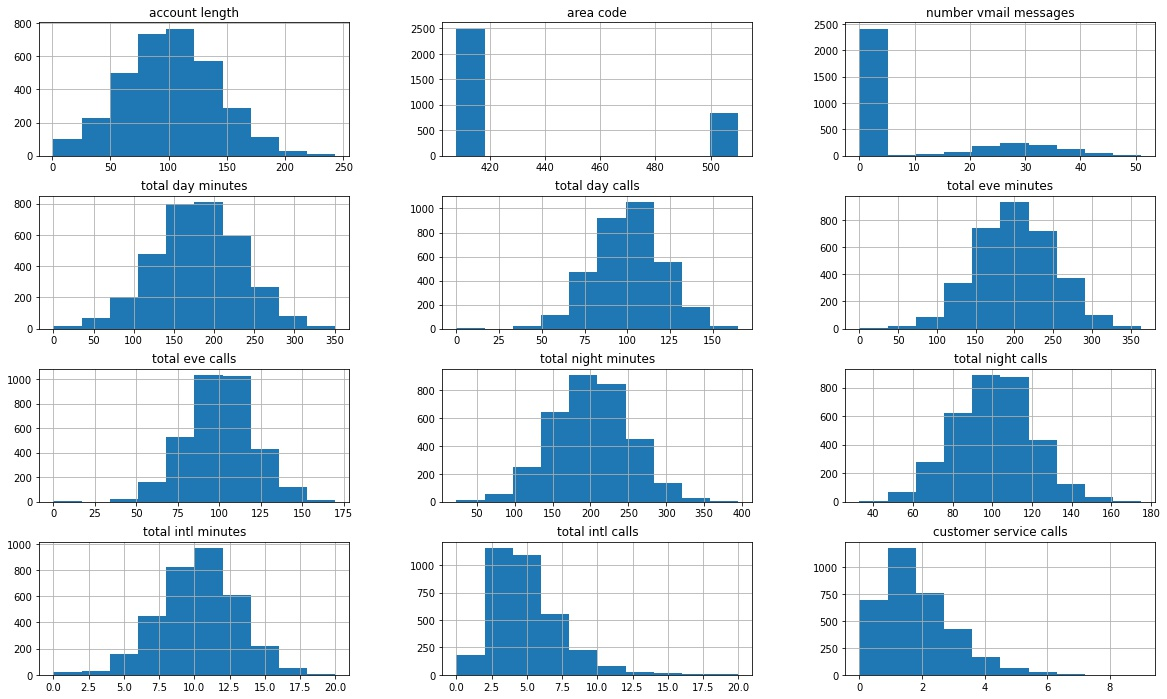

In [ ]:
df.hist(figsize=(20,12));

In [ ]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day minutes',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

In [ ]:
sns.pairplot(df[features + ['churn']], hue='churn')

ValueError: ignored

##T-SNE

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [ ]:
X = df.drop(['churn', 'state'], axis=1)
X['international plan'] = pd.factorize(X['international plan'])[0]
X['voice mail plan'] = pd.factorize(X['voice mail plan'])[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: ignored

In [ ]:
df.isin(['382-4657']).any()

state                     False
account length            False
area code                 False
phone number               True
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
churn                     False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

##Decision Tree

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#пример
# первый класс
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

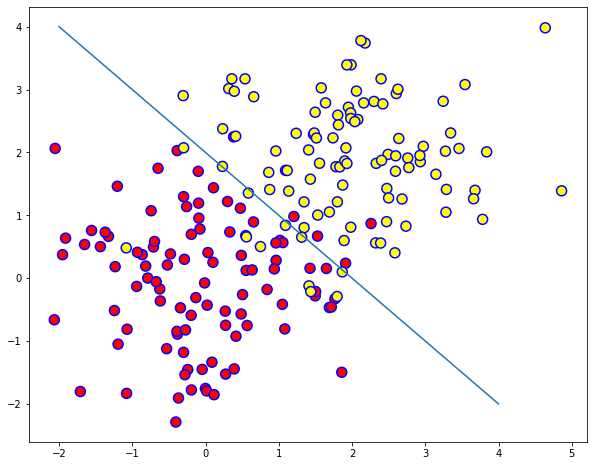

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn', edgecolors='blue', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def get_grid(data):
  x_min, x_max = data[:,0].min() - 1, data[:,0].max() + 1
  y_min, y_max = data[:,1].min() - 1, data[:,1].max() + 1
  return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [ ]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

In [ ]:
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

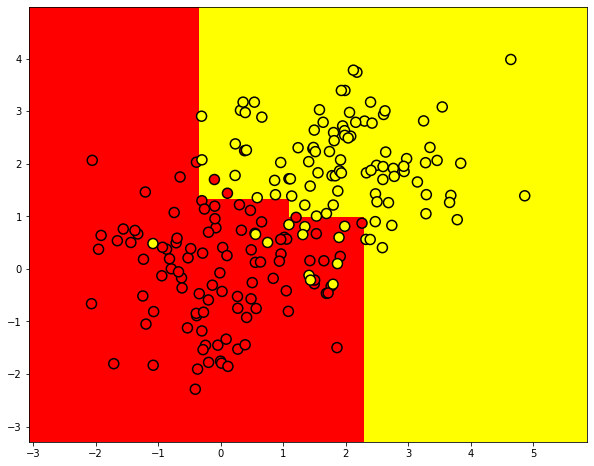

In [ ]:
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

In [ ]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
out_file='small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'

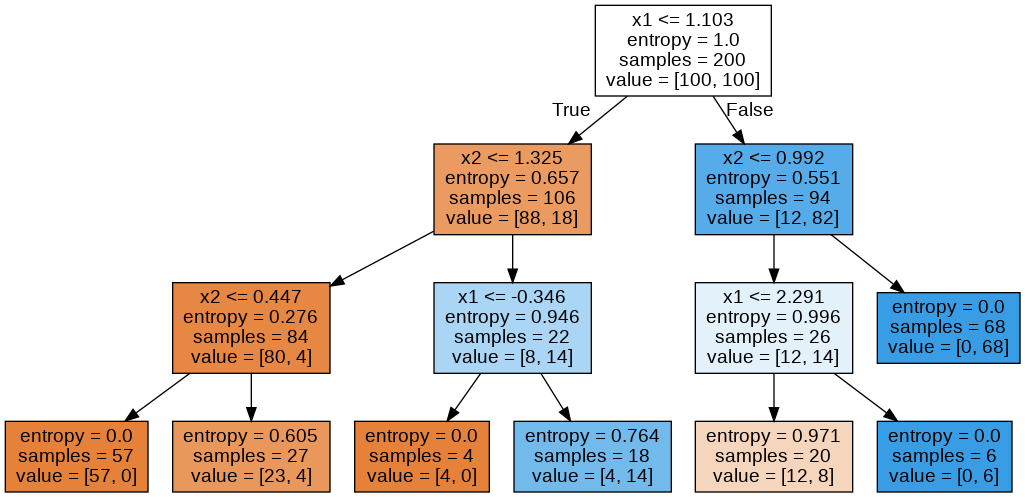

In [ ]:
age = pd.Series([17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33])
target = pd.Series([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
df = pd.DataFrame()

In [ ]:
df['Возраст'] = age
df['Невозврат кредита'] = target

In [ ]:
df

Возраст  Невозврат кредита
0        17                  1
1        64                  0
2        18                  1
3        20                  0
4        38                  1
5        49                  0
6        55                  0
7        25                  1
8        29                  1
9        31                  0
10       33                  1

In [ ]:
age_tree = DecisionTreeClassifier(random_state=17)

In [ ]:
age_tree.fit(df['Возраст'].values.reshape(-1, 1), df['Невозврат кредита'].values)

DecisionTreeClassifier(random_state=17)

In [ ]:
export_graphviz(age_tree, feature_names=['Возраст'], 
out_file='age_tree.dot', filled=True)
!dot -Tpng 'age_tree.dot' -o 'age_tree.png'

In [ ]:
df.sort_values(by='Возраст')

Возраст  Невозврат кредита
0        17                  1
2        18                  1
3        20                  0
7        25                  1
8        29                  1
9        31                  0
10       33                  1
4        38                  1
5        49                  0
6        55                  0
1        64                  0

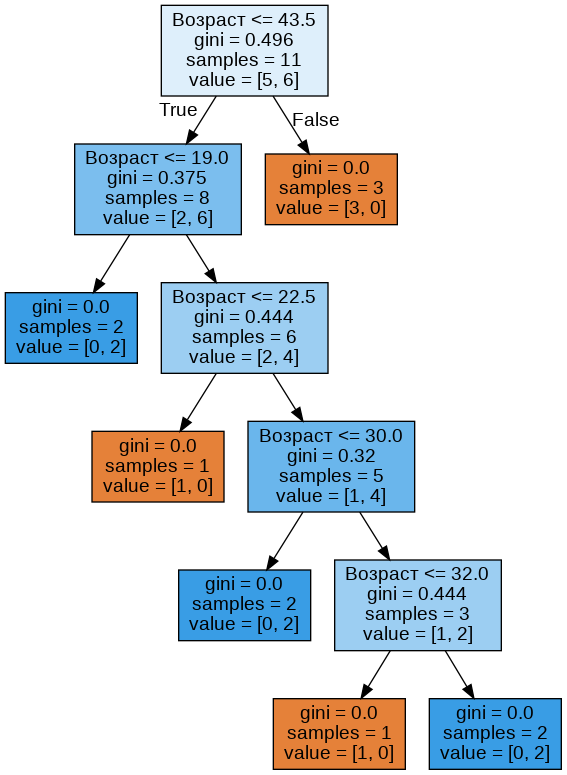

In [ ]:
salary = pd.Series([25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88])

In [ ]:
df['Зарплата'] = salary

In [ ]:
df = df[['Возраст', 'Зарплата', 'Невозврат кредита']]

In [ ]:
#если отсортировать по возрасту, то целевой признак меняется 5 раз
df.sort_values(by='Возраст')

Возраст  Зарплата  Невозврат кредита
0        17        25                  1
2        18        22                  1
3        20        36                  0
7        25        70                  1
8        29        33                  1
9        31       102                  0
10       33        88                  1
4        38        37                  1
5        49        59                  0
6        55        74                  0
1        64        80                  0

In [ ]:
#по зарплате - 7
df.sort_values(by='Зарплата')

Возраст  Зарплата  Невозврат кредита
2        18        22                  1
0        17        25                  1
8        29        33                  1
3        20        36                  0
4        38        37                  1
5        49        59                  0
7        25        70                  1
6        55        74                  0
1        64        80                  0
10       33        88                  1
9        31       102                  0

In [ ]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(df.drop('Невозврат кредита', axis=1), df['Невозврат кредита'])

DecisionTreeClassifier(random_state=17)

In [ ]:
export_graphviz(age_sal_tree, feature_names=['Возраст', 'Зарплата'], 
out_file='age_sal_tree.dot', filled=True)
!dot -Tpng 'age_sal_tree.dot' -o 'age_sal_tree.png'

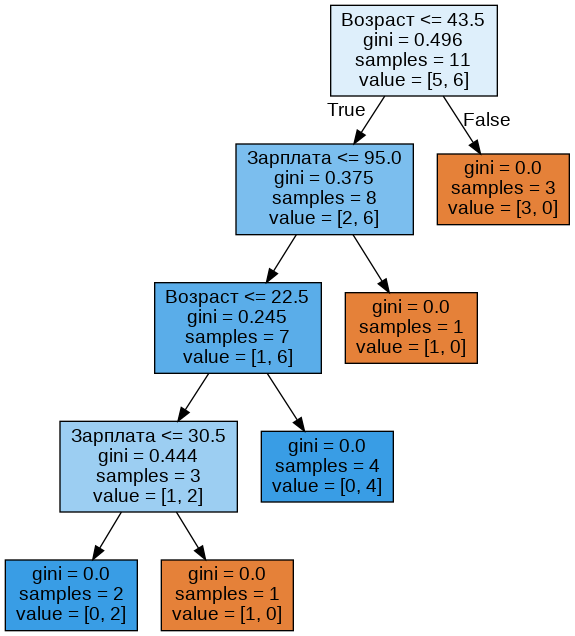

##Выбор параметров модели и кросс-валидация


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ODS Course/BigML_Dataset_633b2abaaba2df313d0016ae.csv')

In [ ]:
df['international plan'] = pd.factorize(df['international plan'])[0]
df['voice mail plan'] = pd.factorize(df['voice mail plan'])[0]
df['churn'] = df['churn'].astype('int')
states = df['state']
y = df['churn']
df.drop(['state', 'churn', 'phone number'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3, random_state=17)

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
tree_pred = tree.predict(X_holdout)
print(accuracy_score(y_holdout, tree_pred))

0.94


In [ ]:
KNN_pred = knn.predict(X_holdout)
print(accuracy_score(y_holdout, KNN_pred))

0.881


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
tree_params = {'max_depth' : range(1,11),
               'max_features' : range(4, 19)}

In [ ]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [ ]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [ ]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [ ]:
tree_grid.best_score_

0.94257014456259

In [ ]:
accuracy_score(tree_grid.predict(X_holdout), y_holdout)

0.946

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [ ]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [ ]:
knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)

In [ ]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

In [ ]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 7}, 0.8859867109023905)

In [ ]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89

Начнем с датасета, состоящего всего из одного признака. Будем брать случайную точку на синусе и добавлять к ней шум — таким образом получим целевую переменную; признаком в этом случае будет координата $x$:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_data(n_support=1000, n_train=25, std=0.3):
  data = {}
  #выберем некоторое количество точек из промежутка 0 и 2pi
  data['support'] = np.linspace(0, 2*np.pi, num=n_support)
  #для каждой посчитаем значение синуса + 1
  #это будет граунд тру
  data['values'] = np.sin(data['support']) + 1
  #из суппорт посемплируем некоторое кол-во точек с возвратом. это будут признаки
  data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
  #опять посчитаем синус + 1, добавим шум, получим таргет
  data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
  return data

In [ ]:
data = generate_data(1000, 25)

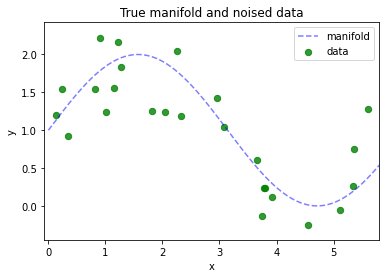

In [ ]:
margin = 0.2
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 10})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#реализуем алгоритм обучения, используя нампай
#добавим колонку единиц к единственному столбцу признаков
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
#перепишем формулу выше, используя нампай
#шаг обучения - в этом шаге ищем лучшую гипотезу h
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
#шаг применения: посчитаем прогноз
y_hat = np.dot(w, X.T)

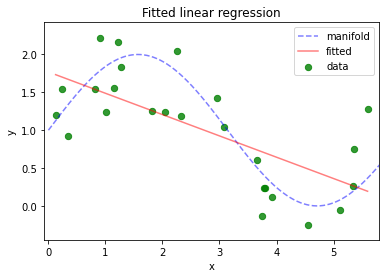

In [ ]:
margin = 0.2
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.5, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 10})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##Регуляризация логистической регрессии пример. Датасет из курса Andrew Ng по ML

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/microchip_tests.txt",
    header=None,
    names=("test1", "test2", "released")
)

Сохраним обучающую выборку и метки целевого класса в отдельных массивах NumPy. Отобразим данные. Красный цвет соответствует бракованным чипам, зеленый – нормальным.

In [ ]:
X = data.iloc[:,:2].values
y = data.iloc[:,2].values

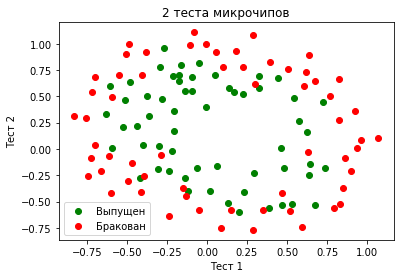

In [ ]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов')
plt.legend();

In [ ]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
  x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
  y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
  np.arange(y_min, y_max, grid_step))

  # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
  # ставим в соответствие свой цвет
  Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [ ]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

Доля правильных ответов классификатора на обучающей выборке: 0.627


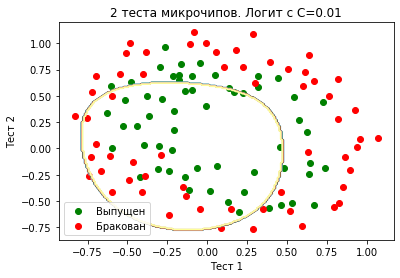

In [ ]:
C = 1e-2
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=0.01')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
round(logit.score(X_poly, y), 3))

Доля правильных ответов классификатора на обучающей выборке: 0.831


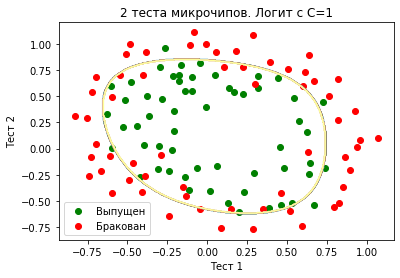

In [ ]:
C = 1
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=1')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
round(logit.score(X_poly, y), 3))

Доля правильных ответов классификатора на обучающей выборке: 0.873


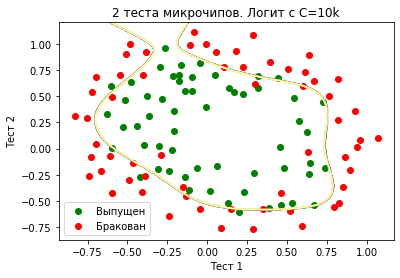

In [ ]:
C = 1e4
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=10k')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
round(logit.score(X_poly, y), 3))

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.4s finished


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       6.45088409e+02, 6.60144909e+02, 6.75552832e+02, 6.91320378e+02,
       7.07455942e+02, 7.23968114e+02, 7.40865683e+02, 7.58157646e+02,
       7.75853206e+02, 7.93961785e+02, 8.12493021e+02, 8.31456781e+02,
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     n_jobs=-1, verbose=1)

##Анализ отзывов IMDB к фильмам

In [ ]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [ ]:
reviews_train = load_files("/content/aclImdb/train")
text_train, y_train = reviews_train.data, reviews_train.target

In [ ]:
print("Number of documents in training data: %d" % len(text_train))
print(np.bincount(y_train))

Number of documents in training data: 75000
[12500 12500 50000]


In [ ]:
# поменяйте путь к файлу
reviews_test = load_files("/content/aclImdb/test")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: %d" % len(text_test))
print(np.bincount(y_test))

Number of documents in test data: 25000
[12500 12500]


In [ ]:
cv = CountVectorizer()
cv.fit(text_train)

In [ ]:
len(cv.vocabulary_)

124255

In [ ]:
print(cv.get_feature_names()[:50])
print(cv.get_feature_names()[50000:50050])

['00', '000', '0000', '0000000000000000000000000000000001', '0000000000001', '000000001', '000000003', '00000001', '000001745', '00001', '0001', '00015', '0002', '0007', '00083', '000ft', '000s', '000th', '001', '002', '003', '003830', '004', '005', '006', '007', '0079', '008', '0080', '0083', '009', '0091042', '0093638', '00am', '00o', '00pm', '00s', '01', '015', '019', '01p', '01pm', '02', '020410', '022', '0267', '029', '03', '0312', '039']
['heathen', 'heathens', 'heather', 'heatherbennett', 'heatherly', 'heathers', 'heatherton', 'heathkit', 'heathrow', 'heating', 'heatman', 'heatmiser', 'heaton', 'heats', 'heatseeker', 'heatwave', 'heave', 'heaved', 'heaven', 'heavenlier', 'heavenliness', 'heavenly', 'heavens', 'heavenward', 'heaves', 'heavier', 'heavies', 'heaviest', 'heavily', 'heaviness', 'heaving', 'heavy', 'heavyarms', 'heavyhanded', 'heavys', 'heavyset', 'heavyweight', 'heavyweights', 'heber', 'hebert', 'hebetude', 'hebner', 'hebraic', 'hebrew', 'hebrews', 'hebrides', 'hebro

In [ ]:
X_train = cv.transform(text_train)
X_test = cv.transform(text_test)

In [ ]:
logit = LogisticRegression(n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)
print(round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3))

0.723 0.132


In [ ]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
  # get coefficients with large absolute values 
  coef = classifier.coef_.ravel()
  positive_coefficients = np.argsort(coef)[-n_top_features:]
  negative_coefficients = np.argsort(coef)[:n_top_features]
  interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
  # plot them
  plt.figure(figsize=(15, 5))
  colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
  plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
  feature_names = np.array(feature_names)
  plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

In [ ]:
def plot_grid_scores(grid, param_name):
  plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
  color='green', label='train')
  plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
  color='red', label='test')
  plt.legend();

IndexError: ignored

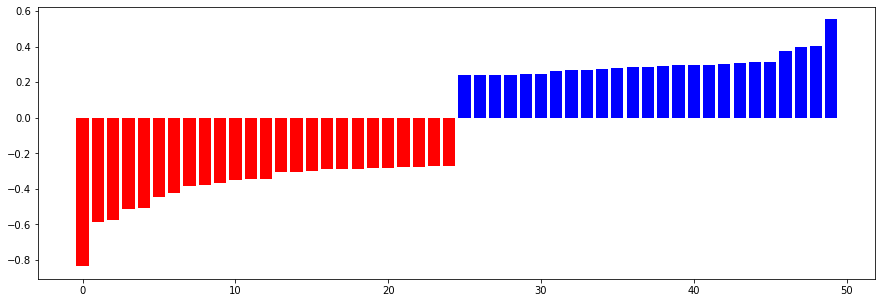

In [ ]:
visualize_coefficients(logit, cv.get_feature_names())

In [ ]:
from sklearn.pipeline import make_pipeline

text_pipe_logit = make_pipeline(CountVectorizer(), 
LogisticRegression(n_jobs=-1, random_state=7))

text_pipe_logit.fit(text_train, y_train)
print(text_pipe_logit.score(text_test, y_test))

from sklearn.model_selection import GridSearchCV

param_grid_logit = {'logisticregression__C': np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(text_pipe_logit, param_grid_logit, cv=3, n_jobs=-1)

grid_logit.fit(text_train, y_train)
grid_logit.best_params_, grid_logit.best_score_
plot_grid_scores(grid_logit, 'logisticregression__C')
grid_logit.score(text_test, y_test)

0.1324


KeyError: ignored

##Бутстрэп

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%matplotlib inline

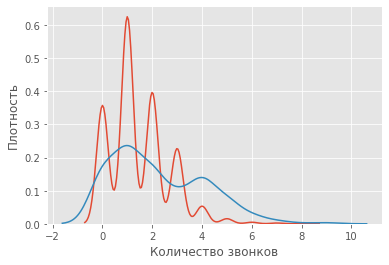

In [ ]:
telecom_data = pd.read_csv('/content/drive/MyDrive/ODS_Course/BigML_Dataset_633b2abaaba2df313d0016ae.csv')

fig = sns.kdeplot(telecom_data[telecom_data['churn'] == False]['customer service calls'], label = 'loyal')
fig = sns.kdeplot(telecom_data[telecom_data['churn'] == True]['customer service calls'], label = 'churn')        
fig.set(xlabel='Количество звонков', ylabel='Плотность')    
plt.show()

In [ ]:
import numpy as np

In [ ]:
def get_bootstrap_samples(data, n_samples):
  indices = np.random.randint(0, len(data), (n_samples, len(data)))
  samples = data[indices]
  return samples

def stat_intervals(stat, alpha):
  boundaries = np.percentile(stat, [10 * alpha / 2., 100 * (1 - alpha / 2.)])
  return boundaries

In [ ]:
telecom_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [ ]:
loyal_calls = telecom_data[telecom_data['churn'] == False]['customer service calls'].values
churn_calls = telecom_data[telecom_data['churn'] == True]['customer service calls'].values

In [ ]:
np.random.seed(0)

In [ ]:
loyal_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(loyal_calls, 1000)]
churn_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(churn_calls, 1000)]

In [ ]:
print(stat_intervals(loyal_mean_scores, 0.05))

[1.39771842 1.49473684]


In [ ]:
print(stat_intervals(churn_mean_scores, 0.05))

[2.         2.39761905]


In [ ]:
telecom_data[telecom_data['churn'] == False]['customer service calls'].mean()

1.4498245614035088

In [ ]:
telecom_data[telecom_data['churn'] == True]['customer service calls'].mean()

2.229813664596273

##применение случайного леса в реальной задаче

In [ ]:
#построим бейслайн
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ODS_Course/BigML_Dataset_633b2abaaba2df313d0016ae.csv')

In [ ]:
#сначала выбираем только колонки с числовым типом данных
cols = []
for i in df.columns:
  if (df[i].dtype == 'int64') | (df[i].dtype == 'float64'):
    cols.append(i)

In [ ]:
#разделяем на признаки и целевую переменную
X, y = df[cols].copy(), np.asarray(df['churn'], dtype='int8')

In [ ]:
# инициализируем стратифицированную выборку нашего датасета
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#инициализируем наш классификатор с дефолтными параметрами
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

In [ ]:
#обучаем на тренировочном датасете
results = cross_val_score(rfc, X, y, cv=skf)

In [ ]:
#оцениваем долю верных ответов на тестовом датасете
print("CV accuracy score {:.2f}%".format(results.mean()*100))

CV accuracy score 92.50%


Получили 92.5% Попробуем улучшить результат и посмотреть, как ведут себя кривые валидации при изменении основных параметров

In [ ]:
#создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

#обучаем на тренировочном датасете
for ntrees in trees_grid:
  rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
  temp_train_acc = []
  temp_test_acc = []
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rfc.fit(X_train, y_train)
    temp_train_acc.append(rfc.score(X_train, y_train))
    temp_test_acc.append(rfc.score(X_test, y_test))
  train_acc.append(temp_train_acc)
  test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100,
                                                            trees_grid[np.argmax(test_acc.mean(axis=1))]))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

Best accuracy on CV is 92.50% with 100 trees


Text(0.5, 0, 'N_estimators')

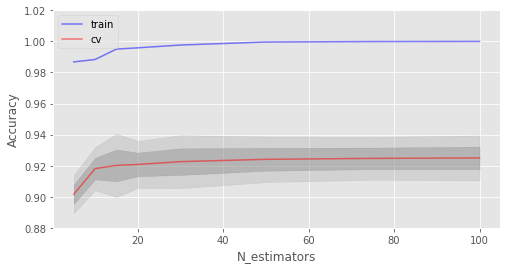

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")

Как видно, при достижении определенного числа деревьев наша доля верных ответов на тесте выходит на асимптоту, и вы можете сами решить, сколько деревьев оптимально для вашей задачи.
На рисунке также видно, что на тренировочной выборке мы смогли достичь 100% точности, это говорит нам о переобучении нашей модели. Чтобы избежать переобучения, мы должны добавить параметры регуляризации в модель.

In [ ]:
#Начнем с параметра максимальной глубины – max_depth. (зафиксируем к-во деревьев 100)
#создаем списки для сохранения точности на обучающей и тестовой выборках
train_acc = []
test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 23]
#обучаем на тренировочном датасете
for max_depth in max_depth_grid:
  rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
  temp_train_acc = []
  temp_test_acc = []
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rfc.fit(X_train, y_train)
    temp_train_acc.append(rfc.score(X_train, y_train))
    temp_test_acc.append(rfc.score(X_test, y_test))
  train_acc.append(temp_train_acc)
  test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100,
                                                                max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.50% with 23 max_depth


Text(0.5, 0, 'Max_depth')

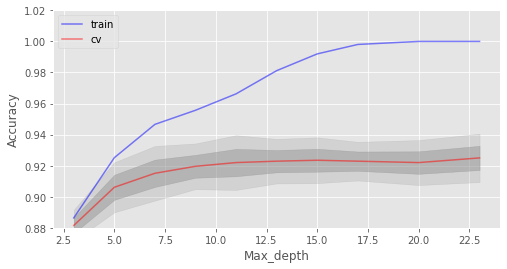

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth")

In [ ]:
#Еще важный параметр min_samples_leaf, он также выполняет функцию регуляризатора.
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.50% with 1 min_samples_leaf


Text(0.5, 0, 'Min_samples_leaf')

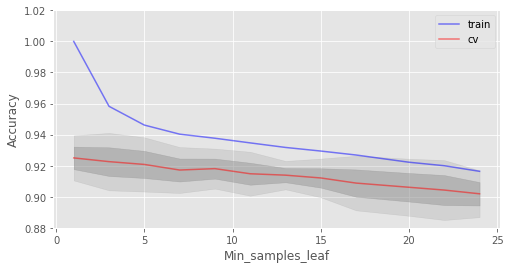

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf")

Рассмотрим такой параметр как max_features. Для задач классификации по умолчанию используется $\large \sqrt{n}$, где n — число признаков. Давайте проверим, оптимально ли в нашем случае использовать 4 признака или нет.

In [ ]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

# Обучаем на тренировочном датасете
for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.50% with 4 max_features


Text(0.5, 0, 'Max_features')

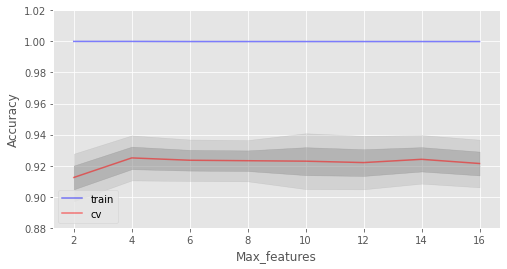

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features")

Мы рассмотрели, как ведут себя кривые валидации в зависимости от изменения основных параметров. Давайте теперь с помощью GridSearchCV найдем оптимальные параметры для нашего примера.

In [ ]:
parameters = {'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5, 10, 15, 20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 7, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [ ]:
gcv.best_params_

{'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 3}

In [ ]:
gcv.best_score_*100

92.5596661128895

##Тема 6. Построение и отбор признаков

In [ ]:
import kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c two-sigma-connect-rental-listing-inquiries

 94% 105M/112M [00:01<00:00, 59.8MB/s] 
100% 112M/112M [00:02<00:00, 57.8MB/s]


In [ ]:
!unzip /content/two-sigma-connect-rental-listing-inquiries.zip

Archive:  /content/two-sigma-connect-rental-listing-inquiries.zip
  inflating: Kaggle-renthop.torrent  
  inflating: images_sample.zip       
  inflating: sample_submission.csv.zip  
  inflating: test.json.zip           
  inflating: train.json.zip          


In [ ]:
!unzip /content/train.json.zip
!unzip /content/test.json.zip

Archive:  /content/train.json.zip
  inflating: train.json              
Archive:  /content/test.json.zip
  inflating: test.json               


In [ ]:
import pandas as pd
import json

In [ ]:
with open('train.json', 'r') as raw_data:
    data = json.load(raw_data)
    df = pd.DataFrame(data)

###Извлечение признаков (feature extraction)

> Блок с отступами



In [ ]:
from functools import reduce
import numpy as np

texts = [['i', 'have', 'a', 'cat'],
         ['he', 'have', 'a', 'dog'],
         ['he', 'and', 'i', 'have', 'a', 'cat', 'and', 'a', 'dog']]

dictionary = list(enumerate(set(reduce(lambda x, y: x + y, texts))))

def vectorize(text):
    vector = np.zeros(len(dictionary))
    for i, word in dictionary:
        num = 0
        for w in text:
            if w == word:
                num += 1
        if num:
            vector[i] = num
    return vector

for t in texts:
    print(vectorize(t))

[0. 1. 1. 1. 1. 0. 0.]
[0. 1. 1. 0. 0. 1. 1.]
[2. 2. 1. 1. 1. 1. 1.]


###Выделение признаков

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
x_data_generated, y_data_generated = make_classification()

In [ ]:
x_data_generated.shape

(100, 20)

In [ ]:
VarianceThreshold(1.1).fit_transform(x_data_generated).shape

(100, 6)

In [ ]:
pipe = make_pipeline(SelectFromModel(estimator=RandomForestClassifier()), LogisticRegression())

In [ ]:
lr = LogisticRegression()
rf = RandomForestClassifier()

In [ ]:
print(cross_val_score(lr, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())
print(cross_val_score(rf, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())
print(cross_val_score(pipe, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())

-0.4585796033978077
-0.3593567701869206
-0.2682746259546818


Перебор

Наконец, самый надежный, но и самый вычислительно сложный способ основан на банальном переборе: обучаем модель на подмножестве "фичей", запоминаем результат, повторяем для разных подмножеств, сравниваем качество моделей. Такой подход называется Exhaustive Feature Selection.

In [ ]:
?SequentialFeatureSelector

In [ ]:
selector = SequentialFeatureSelector(LogisticRegression(), scoring='neg_log_loss', n_features_to_select=3, direction='backward', n_jobs=-1)

In [ ]:
selector.fit(x_data_generated, y_data_generated)

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select=3, n_jobs=-1,
                          scoring='neg_log_loss')

In [ ]:
selector.get_feature_names_out()

array(['x1', 'x4', 'x6'], dtype=object)

In [ ]:
selector.get_params()

{'cv': 5,
 'direction': 'backward',
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(),
 'n_features_to_select': 3,
 'n_jobs': -1,
 'scoring': 'neg_log_loss'}

##Тема 7. Обучение без учителя: PCA и кластеризация

###1. Метод главных компонент (PCA)

####Набор данных по цветкам ириса

Начнём с того, что загрузим все необходимые модули и покрутим привычный датасет с ирисами по примеру из документации пакета scikit-learn.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Загрузим наши ириски
iris = datasets.load_iris()
X = iris.data
y = iris.target

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


[]

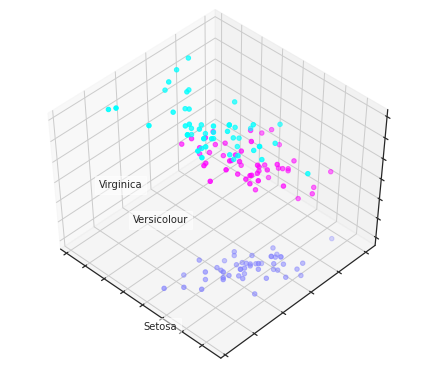

In [ ]:
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Поменяем порядок цветов меток, чтобы они соответствовали правильному
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=plt.cm.cool)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3, stratify=y)

In [ ]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
preds = clf.predict_proba(X_test)

In [ ]:
print("Accuracy {:.5f}".format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy 0.88889


Теперь попробуем сделать то же самое, но с данными, для которых мы снизили размерность до 2D:

In [ ]:
#прогоним через встроенный в sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

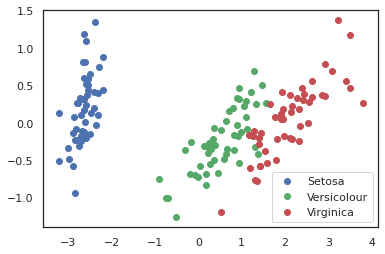

In [ ]:
#просмотрим получившиеся точки в новом наборе данных
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=42, test_size=.3, stratify=y)
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.91111


Посмотрим на 2 главные компоненты в последнем PCA-представлении данных и на тот процент исходной дисперсии в даных, который они "объясняют"

In [ ]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
2 component: 5.31% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


####Набор данных по рукописным цифрам

In [ ]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

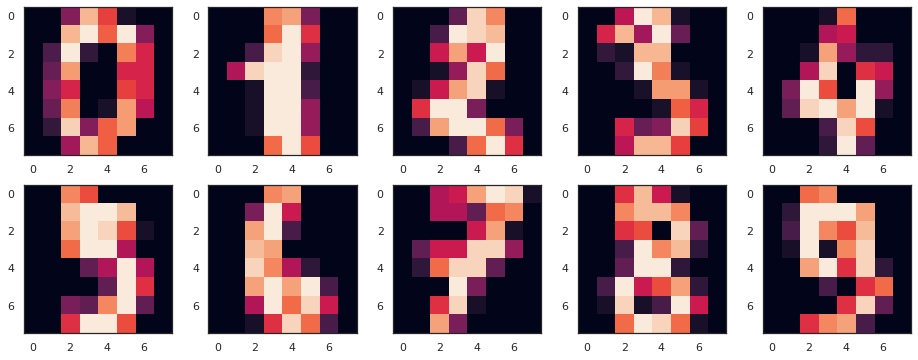

In [ ]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

In [ ]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

Projecting 64-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

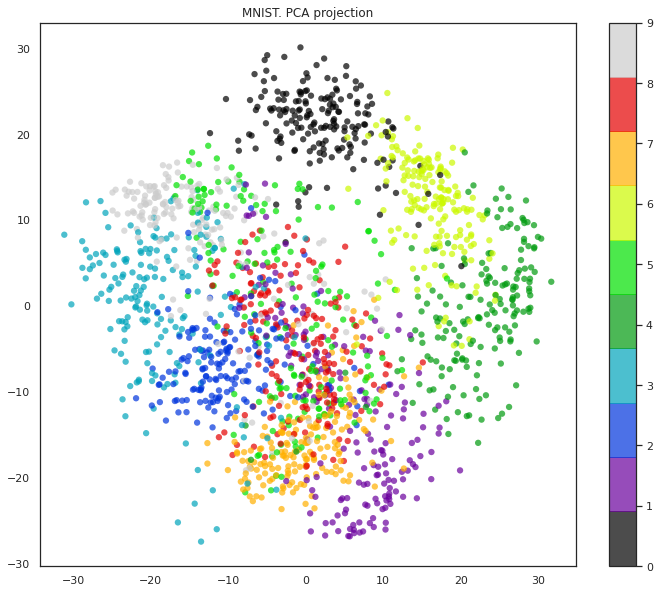

In [ ]:
print('Projecting %d-dimensional data to 2D' % X.shape[1])
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 27.3 s, sys: 323 ms, total: 27.6 s
Wall time: 19.6 s


Text(0.5, 1.0, 'MNIST. t-SNE projection')

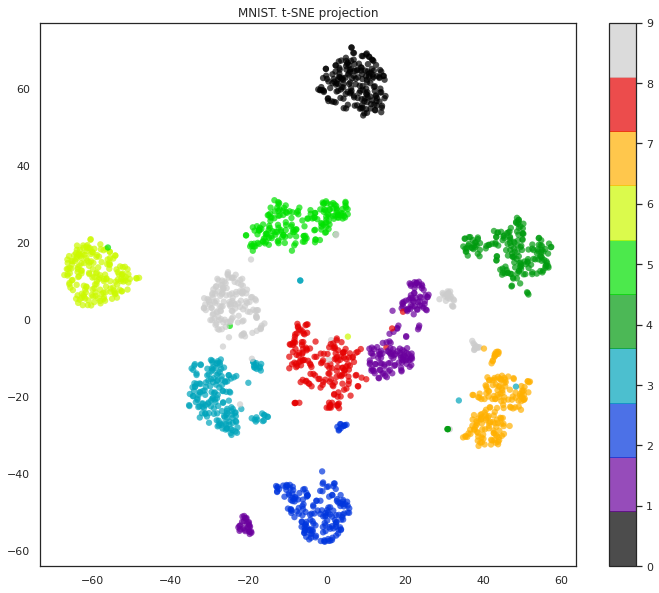

In [ ]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

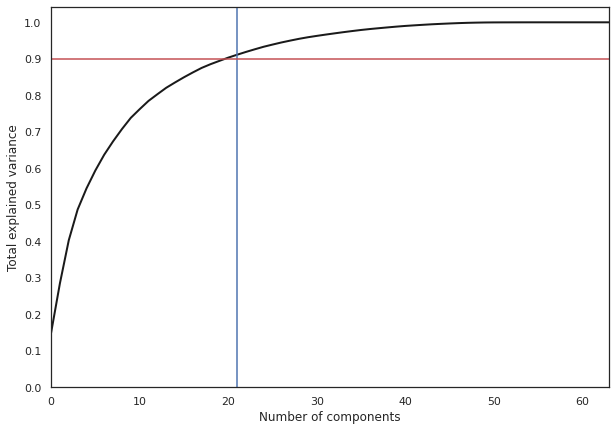

In [ ]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

###2. Кластеризация

####k-means

In [ ]:
import numpy as np
X = np.zeros((150, 2))

np.random.seed(42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)


X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

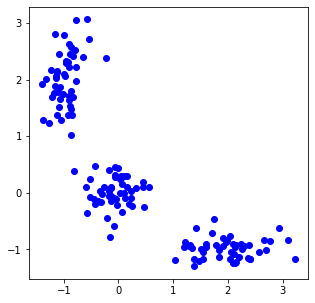

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo');

In [ ]:
# В scipy есть замечательная функция, которая считает расстояния
# между парами точек из двух массивов, подающихся ей на вход
from scipy.spatial.distance import cdist

centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))
cent_history = []
cent_history.append(centroids)

In [ ]:
for i in range(3):
  #считаем расстояния наблюдений до центроид
  distances = cdist(X, centroids)
  #смотрим, к какой центроиде наблюдения ближе всего
  labels = distances.argmin(axis=1)
  #положим в каждую центроиду геом. центр ее точек
  centroids = centroids.copy()
  centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
  centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
  centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
  #centroids[3, :] = np.mean(X[labels == 3, :], axis=0)
  cent_history.append(centroids)

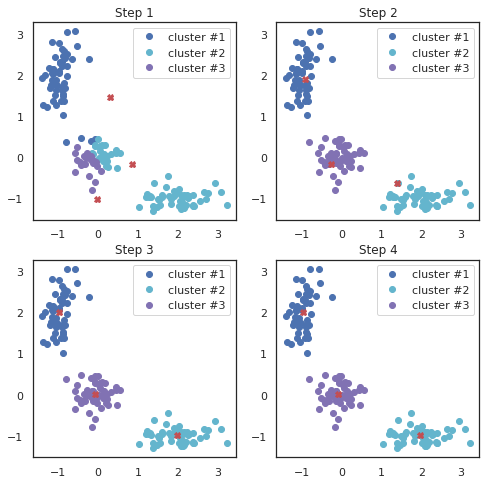

In [ ]:
# А теперь нарисуем всю эту красоту
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

Выбор количества кластеров

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

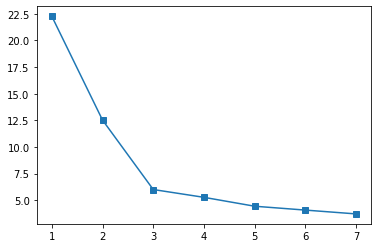

In [ ]:
inertia = []
for i in range(1, 8):
  kmeans = KMeans(n_clusters=i, random_state=1).fit(X)
  inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');

Видим, что $J(C_k)$ падает сильно при увеличении числа кластеров с 1 до 2 и с 2 до 3 и уже не так сильно – при изменении $k$ с 3 до 4. Значит, в данной задаче оптимально задать 3 кластера.



####Агломеративная кластеризация

In [ ]:
import numpy as np
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

In [ ]:
X = np.zeros((150, 2))
np.random.seed(42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

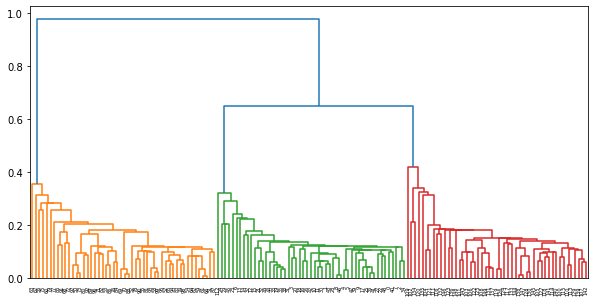

In [ ]:
distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

####Hashing trick

In [ ]:
hash_space = 25
for s in ('university.degree', 'high.school', 'illiterate'):
    print(s, '->', hash(s) % hash_space)

university.degree -> 16
high.school -> 7
illiterate -> 2


Представим, что у нас в выборке есть холостой студент, которому позвонили в понедельник, тогда его вектор признаков будет сформирован аналогично One-Hot Encoding, но в едином пространстве фиксированного размера для всех признаков:

-

###Vowpal Wabbit

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
newsgroups = fetch_20newsgroups(subset='train')

In [ ]:
text = newsgroups['data'][0]
target = newsgroups['target_names'][newsgroups['target'][0]]

print('-----')
print(target)
print('-----')
print(text.strip())
print('----')

-----
rec.autos
-----
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----
----


Приведем данные к формату Vowpal Wabbit, при этом оставляя только слова не короче 3 символов. Здесь мы не выполняем многие важные в анализе текстов процедуры (стемминг и лемматизацию), но, как увидим, задача и так будет решаться хорошо.

In [ ]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
def to_vw_format(document, label=None):
    return str(label or '') + ' |text ' + ' '.join(re.findall('\w{3,}', document.lower())) + '\n'

to_vw_format(text, 1 if target == 'rec.autos' else -1)

'1 |text from lerxst wam umd edu where thing subject what car this nntp posting host rac3 wam umd edu organization university maryland college park lines was wondering anyone out there could enlighten this car saw the other day was door sports car looked from the late 60s early 70s was called bricklin the doors were really small addition the front bumper was separate from the rest the body this all know anyone can tellme model name engine specs years production where this car made history whatever info you have this funky looking car please mail thanks brought you your neighborhood lerxst\n'

Разобьем выборку на обучающую и тестовую и запишем в файл преобразованные таким образом документы. Будем считать документ положительным, если он относится к рассылке про автомобили rec.autos. Так мы построим модель, отличающую новости про автомобили от остальных.

In [ ]:
all_documents = newsgroups['data']
all_targets = [1 if newsgroups['target_names'][target] == 'rec.autos'
               else -1 for target in newsgroups['target']]

In [ ]:
train_documents, test_documents, train_labels, test_labels = \
    train_test_split(all_documents, all_targets, random_state=7)

In [ ]:
with open('20news_train.vw', 'w') as vw_train_data:
    for text, target in zip(train_documents, train_labels):
        vw_train_data.write(to_vw_format(text, target))
with open('20news_test.vw', 'w') as vw_test_data:
    for text in test_documents:
        vw_test_data.write(to_vw_format(text))

Запустим Vowpal Wabbit на сформированном файле. Мы решаем задачу классификации, поэтому зададим функцию потерь в значение hinge (линейный SVM). Построенную модель мы сохраним в соответствующий файл 20news_model.vw.

In [ ]:
!vw -d 20news_train.vw \
  --loss_function hinge -f 20news_model.vw

final_regressor = 20news_model.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = 20news_train.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
1.000000 1.000000            1            1.0  -1.0000   0.0000      157
0.911276 0.822551            2            2.0  -1.0000  -0.1774      159
0.605793 0.300311            4            4.0  -1.0000  -0.3994       92
0.419594 0.233394            8            8.0  -1.0000  -0.8167      129
0.313998 0.208402           16           16.0  -1.0000  -0.6509      108
0.196014 0.078029           32           32.0  -1.0000  -1.0000      115
0.183158 0.170302           64           64.0  -1.0000  -0.7072      114
0.261046 0.338935          128          128.0   1.0000  -0.7900      110
0.262910 0.264774          256          256.0  -1.0000  -0.6425       44
0.216663 0.170415          5

Модель обучена. VW выводит достаточно много полезной информации по ходу обучения (тем не менее, ее можно погасить, если задать параметр --quiet). Подробно вывод диагностической информации разобран в документации VW на GitHub – тут. Обратите внимание, что average loss снижался по ходу выполнения итераций. Для вычисления функции потерь VW использует еще не просмотренные примеры, поэтому, как правило, эта оценка является корректной. Применим обученную модель на тестовой выборке, сохраняя предсказания в файл с помощью опции -p:

In [ ]:
!vw -i 20news_model.vw -t -d 20news_test.vw -p 20news_test_predictions.txt

only testing
predictions = 20news_test_predictions.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = 20news_test.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
    n.a.     n.a.            1            1.0  unknown   1.0000      349
    n.a.     n.a.            2            2.0  unknown  -1.0000       50
    n.a.     n.a.            4            4.0  unknown  -1.0000      251
    n.a.     n.a.            8            8.0  unknown  -1.0000      237
    n.a.     n.a.           16           16.0  unknown  -0.8978      106
    n.a.     n.a.           32           32.0  unknown  -1.0000      964
    n.a.     n.a.           64           64.0  unknown  -1.0000      261
    n.a.     n.a.          128          128.0  unknown   0.4621       82
    n.a.     n.a.          256          256.0  unknown  -1.0000      186
    n.a.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

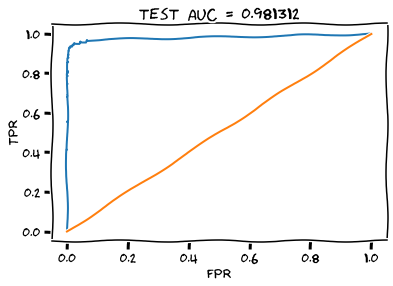

In [ ]:
with open('20news_test_predictions.txt') as pred_file:
    test_prediction = [float(label) for label in pred_file.readlines()]

auc = roc_auc_score(test_labels, test_prediction)
roc_curve = roc_curve(test_labels, test_prediction)

with plt.xkcd():
    plt.plot(roc_curve[0], roc_curve[1]);
    plt.plot([0,1], [0,1])
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('test AUC = %f' % (auc)); plt.axis([-0.05,1.05,-0.05,1.05]);

#####Новости. Многоклассовая классификация

Используем ту же выборку, что в прошлой части, но решаем задачу многоклассовой классификации. Тут Vowpal Wabbit слегка капризничает – он любит, чтоб метки классов были распределены от 1 до K, где K – число классов в задаче классификации (в нашем случае – 20). Поэтому придется применить LabelEncoder, да еще и один добавить потом (LabelEncoder переводит метки в диапозон от 0 до K-1).

In [ ]:
all_documents = newsgroups['data']
topic_encoder = LabelEncoder()
all_targets_mult = topic_encoder.fit_transform(newsgroups['target']) + 1

Выборки будут те же, а метки поменяются, train_labels_mult и test_labels_mult – векторы меток от 1 до 20.

In [ ]:
train_documents, test_documents, train_labels_mult, test_labels_mult = \
    train_test_split(all_documents, all_targets_mult, random_state=7)

with open('20news_train_mult.vw', 'w') as vw_train_data:
    for text, target in zip(train_documents, train_labels_mult):
        vw_train_data.write(to_vw_format(text, target))
with open('20news_test_mult.vw', 'w') as vw_test_data:
    for text in test_documents:
        vw_test_data.write(to_vw_format(text))

Обучим Vowpal Wabbit в режиме многоклассовой классификации, передав параметр oaa (от "one against all"), равный числу классов. Также перечислим параметры, которые можно понастраивать, и от которых качество модели может зависеть довольно значительно (более полно – в официальном тьюториале по Vowpal Wabbit):

In [ ]:
%%time
!vw --oaa 20 20news_train_mult.vw \
-f 20news_model_mult.vw --loss_function=hinge

final_regressor = 20news_model_mult.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = 20news_train_mult.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
1.000000 1.000000            1            1.0       15        1      157
1.000000 1.000000            2            2.0        2       15      159
1.000000 1.000000            4            4.0       15       10       92
1.000000 1.000000            8            8.0       16       15      129
1.000000 1.000000           16           16.0       13       12      108
0.937500 0.875000           32           32.0        2        9      115
0.906250 0.875000           64           64.0       16       16      114
0.867188 0.828125          128          128.0        8        4      110
0.816406 0.765625          256          256.0        7       15       44
0.646484 0.476562 

In [ ]:
%%time
!vw -i 20news_model_mult.vw -t \
-d 20news_test_mult.vw \
-p 20news_test_predictions_mult.txt

only testing
predictions = 20news_test_predictions_mult.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = 20news_test_mult.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
    n.a.     n.a.            1            1.0  unknown        8      349
    n.a.     n.a.            2            2.0  unknown        6       50
    n.a.     n.a.            4            4.0  unknown       18      251
    n.a.     n.a.            8            8.0  unknown       18      237
    n.a.     n.a.           16           16.0  unknown        4      106
    n.a.     n.a.           32           32.0  unknown       15      964
    n.a.     n.a.           64           64.0  unknown        4      261
    n.a.     n.a.          128          128.0  unknown        8       82
    n.a.     n.a.          256          256.0  unknown       10      18

In [ ]:
with open('20news_test_predictions_mult.txt') as pred_file:
    test_prediction_mult = [float(label) 
                            for label in pred_file.readlines()]

In [ ]:
accuracy_score(test_labels_mult, test_prediction_mult)

0.8734535171438671

В качестве примера анализа результатов, посмотрим, с какими темами классификатор путает атеизм.

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
M = confusion_matrix(test_labels_mult, test_prediction_mult)
for i in np.where(M[0,:] > 0)[0][1:]:
    print(newsgroups['target_names'][i], M[0,i], )

rec.autos 1
rec.sport.baseball 1
sci.med 1
soc.religion.christian 3
talk.religion.misc 5


###Рецензии к фильмам IMDB

В этой части мы будем заниматься бинарной классификацией отзывов к фильмам, публикованным на сайте IMDB. Обратите внимание, насколько быстро будет работать Vowpal Wabbit.

Используем функцию load_files из sklearn.datasets для загрузки отзывов по фильмам отсюда. Скачайте данные и укажите свой путь к каталогу imdb_reviews (в нем должны быть каталоги train и test). Разархивирование может занять несколько минут – там 100 тыс. файлов. В обучающей и тестовой выборках по 12500 тысяч хороших и плохих отзывов к фильмам. Отделим данные (собственно, тексты) от меток.

In [ ]:
import os
from sklearn.datasets import load_files

In [ ]:
!mkdir imdb_reviews
!mkdir imdb_reviews/train
!mkdir imdb_reviews/test

In [ ]:
# поменяйте на свой путь
path_to_movies = 'imdb_reviews/'
reviews_train = load_files(os.path.join(path_to_movies, 'train'))
text_train, y_train = reviews_train.data, reviews_train.target

#Тема 9. Анализ временных рядов

##Движемся, сглаживаем, оцениваем

In [ ]:
!wget https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/hour_online.csv

--2022-10-31 19:27:59--  https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/hour_online.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50512 (49K) [text/plain]
Saving to: ‘hour_online.csv’

hour_online.csv     100%[===================>]  49.33K  --.-KB/s    in 0.01s   

2022-10-31 19:27:59 (4.93 MB/s) - ‘hour_online.csv’ saved [50512/50512]



In [ ]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'
init_notebook_mode(connected = True)

def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

dataset = pd.read_csv('hour_online.csv', index_col=['Time'], parse_dates=['Time'])
plotly_df(dataset, title = "Online users")

In [ ]:
def moving_average(series, n):
  return np.average(series[-n:])

In [ ]:
moving_average(dataset.Users, 24)

29858.333333333332

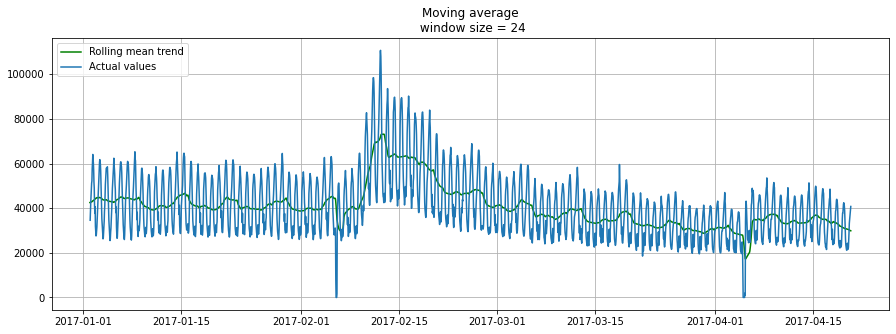

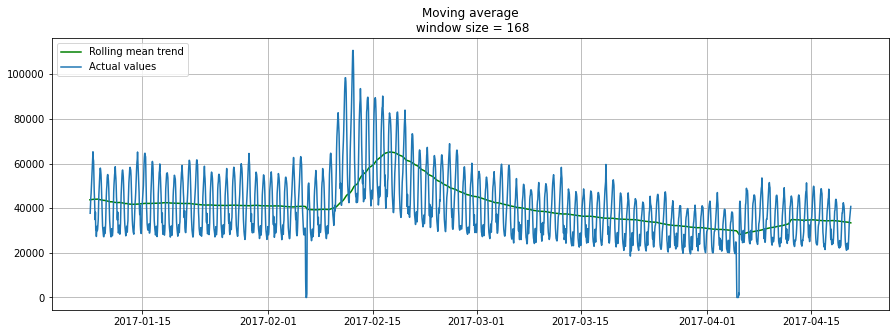

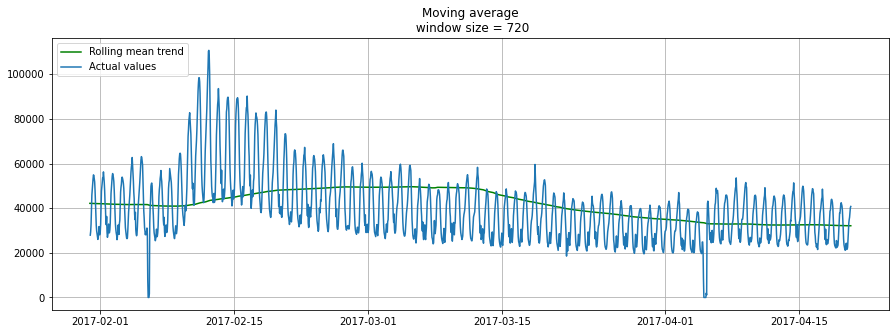

In [ ]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    #rolling_std =  series.rolling(window=n).std()
    #upper_bond = rolling_mean+1.96*rolling_std
    #lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    #plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    #plt.plot(lower_bond, "r--")
    plt.plot(dataset[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

plotMovingAverage(dataset, 24) # сглаживаем по дням
plotMovingAverage(dataset, 24*7) # сглаживаем по неделям
plotMovingAverage(dataset, 24*30) # сглаживаем по месяцам

Взвешенная средняя:

In [ ]:
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series[-n-1] * weights[n]
    return result

weighted_average(dataset.Users, [0.6, 0.2, 0.1, 0.07, 0.03])

35967.55

###Экспоненциальное сглаживание, модель Хольта-Винтерса

###Простое экспоненциальное сглаживание


In [ ]:
def exponential_smoothing(series, alpha):
  result = [series[0]]
  for n in range(1, len(series)):
    result.append(alpha * series[n] + (1 - alpha) * result[n-1])
  return result

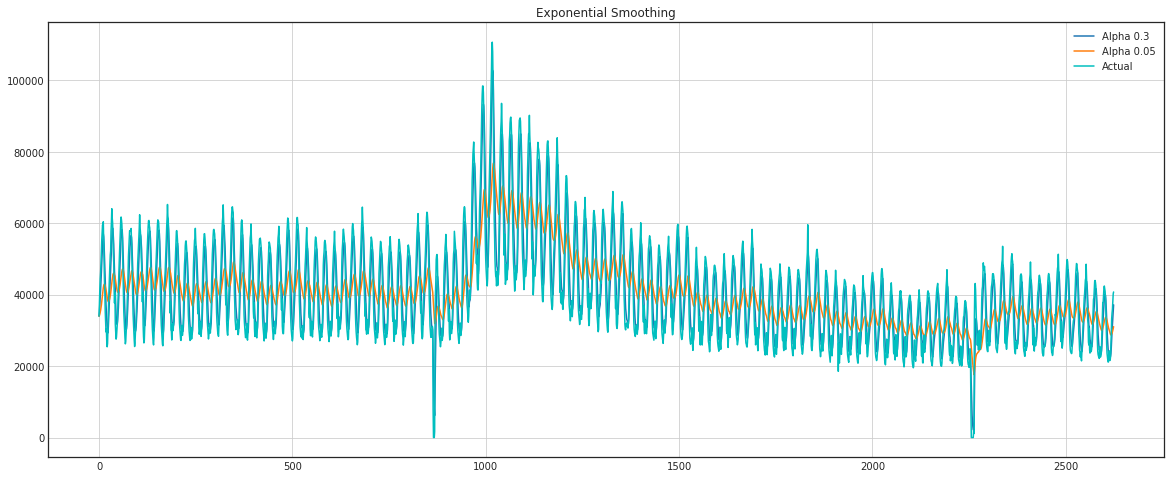

In [ ]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.3, 0.05]:
        plt.plot(exponential_smoothing(dataset.Users, alpha), label="Alpha {}".format(alpha))
    plt.plot(dataset.Users.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)

###Двойное экспоненциальное сглаживание


In [ ]:
def double_exponential_smoothing(series, alpha, beta):
  result = [series[0]]
  for n in range(1, len(series)):
    if n == 1:
      level, trend = series[0], series[1] - series[0]
    if n >= len(series): # прогнозируем
      value = result[-1]
    else:
      value = series[n]
    last_level, level = level, alpha*value + (1-alpha)*(level+trend)
    trend = beta*(level-last_level) + (1-beta)*trend
    result.append(level+trend)
  return result

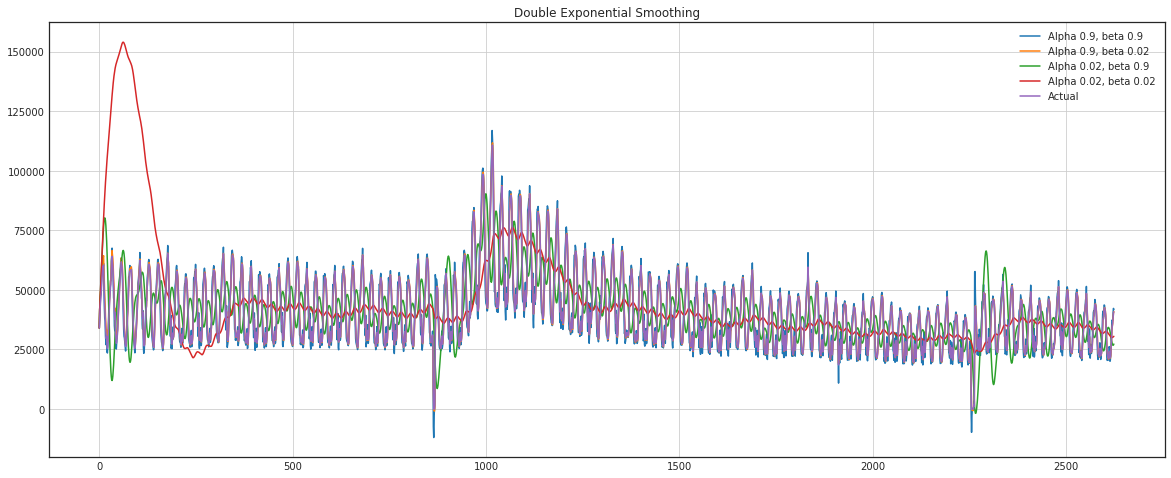

In [ ]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.9, 0.02]:
        for beta in [0.9, 0.02]:
            plt.plot(double_exponential_smoothing(dataset.Users, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(dataset.Users.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

###Кросс-валидация на временных рядах

#####class HoltWinters

In [ ]:
class HoltWinters:

    """
    Модель Хольта-Винтерса с методом Брутлага для детектирования аномалий
    https://fedcsis.org/proceedings/2012/pliks/118.pdf

    # series - исходный временной ряд
    # slen - длина сезона
    # alpha, beta, gamma - коэффициенты модели Хольта-Винтерса
    # n_preds - горизонт предсказаний
    # scaling_factor - задаёт ширину доверительного интервала по Брутлагу (обычно принимает значения от 2 до 3)

    """

    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor

    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  

    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # вычисляем сезонные средние
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # вычисляем начальные значения
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []

        seasonals = self.initial_seasonal_components()

        for i in range(len(self.series)+self.n_preds):
            if i == 0: # инициализируем значения компонент
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])

                self.PredictedDeviation.append(0)

                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                continue
            if i >= len(self.series): # прогнозируем
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])

                # во время прогноза с каждым шагом увеличиваем неопределенность
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 

            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])

                # Отклонение рассчитывается в соответствии с алгоритмом Брутлага
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])

            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i % self.slen])

####CV

В модели Хольта-Винтерса, как и в остальных моделях экспоненциального сглаживания, есть ограничение на величину сглаживающих параметров — каждый из них может принимать значения от 0 до 1, поэтому для минимизации функции потерь нужно выбирать алгоритм, поддерживающий ограничения на параметры, в данном случае — Truncated Newton conjugate gradient.

In [ ]:
#CV on timeseries
from sklearn.model_selection import TimeSeriesSplit

def timeseriesCVscore(x):
    # вектор ошибок
    errors = []

    values = data.values
    alpha, beta, gamma = x

    # задаём число фолдов для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=3) 

    # идем по фолдам, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen = 24*7, alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()

        predictions = model.result[-len(test):]
        actual = values[test]
        error = mean_squared_error(predictions, actual)
        errors.append(error)

    # Возвращаем средний квадрат ошибки по вектору ошибок 
    return np.mean(np.array(errors))

In [ ]:
%%time
data = dataset.Users[:-500] # отложим часть данных для тестирования

# инициализируем значения параметров
x = [0, 0, 0] 

# Минимизируем функцию потерь с ограничениями на параметры
opt = minimize(timeseriesCVscore, x0=x, method="TNC", bounds = ((0, 1), (0, 1), (0, 1)))

# Из оптимизатора берем оптимальное значение параметров
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

0.006635880294816432 0.0 0.046569454900318885
CPU times: user 9.52 s, sys: 7.54 ms, total: 9.53 s
Wall time: 9.54 s


Передадим полученные оптимальные значения коэффициентов $\alpha$, $\beta$ и $\gamma$ и построим прогноз на 5 дней вперёд (128 часов)

In [ ]:
# Передаем оптимальные значения модели, 
data = dataset.Users
model = HoltWinters(data[:-128], slen = 24*7, alpha = alpha_final, beta = beta_final, gamma = gamma_final, n_preds = 128, scaling_factor = 2.56)
model.triple_exponential_smoothing()

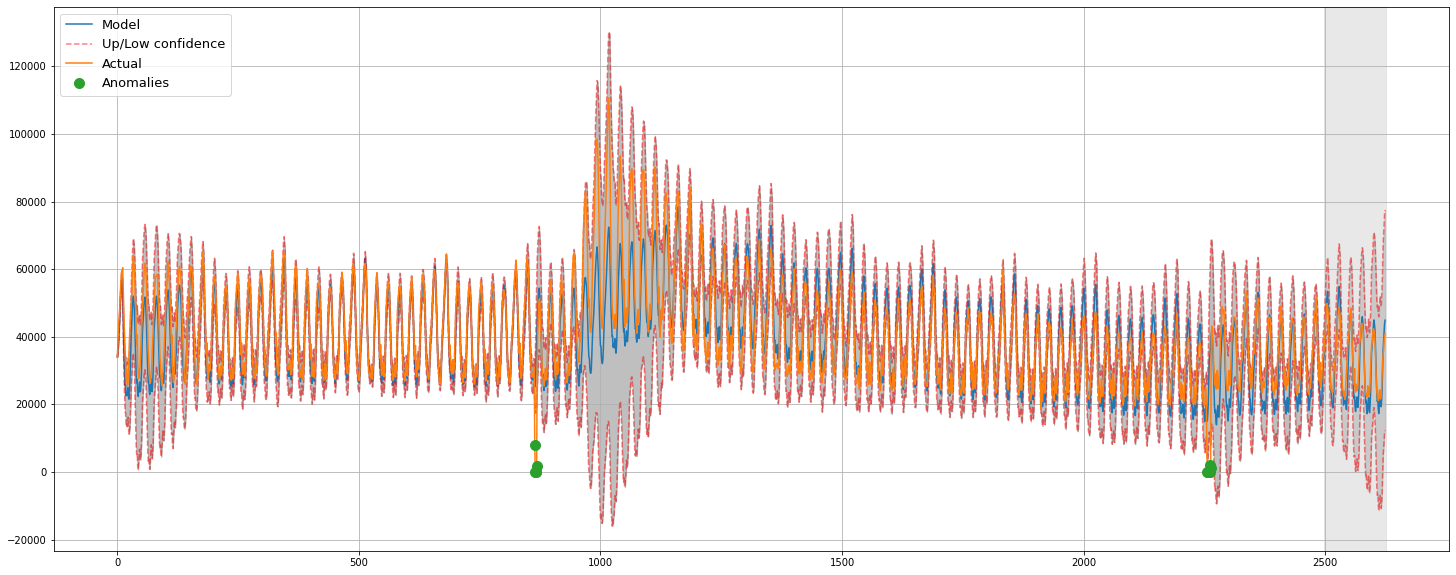

In [ ]:
def plotHoltWinters():
    Anomalies = np.array([np.NaN]*len(data))
    Anomalies[data.values<model.LowerBond] = data.values[data.values<model.LowerBond]
    plt.figure(figsize=(25, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
    plt.plot(model.LowerBond, "r--", alpha=0.5)
    plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, y2=model.LowerBond, alpha=0.5, color = "grey")
    plt.plot(data.values, label = "Actual")
    plt.plot(Anomalies, "o", markersize=10, label = "Anomalies")
    plt.axvspan(len(data)-128, len(data), alpha=0.5, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

plotHoltWinters()

##Эконометрический подход

###Стационарность. Единичные корни

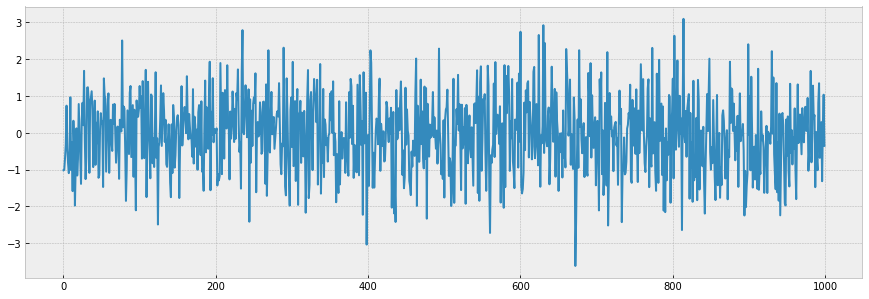

In [3]:
white_noise = np.random.normal(size=1000)
with plt.style.context('bmh'):  
    plt.figure(figsize=(15, 5))
    plt.plot(white_noise)

#Тема 10. Градиентный бустинг

###Пошаговый пример работы Gradient Boosting Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_func_cos(start=0, end=100, step=1):
  res = []
  for i in np.arange(start, end, step):
    res.append(np.cos(i) + np.random.normal(scale=0.5))
  return res

In [3]:
from matplotlib.pyplot import figure

In [11]:
cos_vals = [np.cos(i) for i in np.arange(-5, 5, 10/300)]
y = gen_func_cos(-5, 5, 10/300)

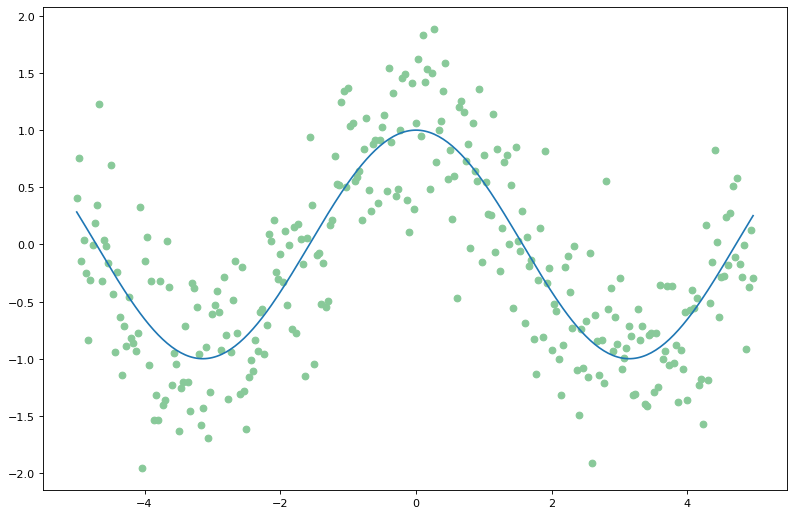

In [13]:
figure(figsize=(12, 8), dpi=80)
plt.plot(np.arange(-5, 5, 10/300), cos_vals)
plt.scatter(np.arange(-5, 5, 10/300), y, color = '#88c999')
plt.show()